In [1]:
from __future__ import division
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import scipy.io as sio

In [2]:
# GCM file 
GCMfilePath = 'C:/Users/Roman/Desktop/Projects/Prosopagnosia/peb/GCM.mat'
GCMfile     = sio.loadmat(GCMfilePath)

In [3]:
Nreg = 4
Nsub = 49
regionNames = ['rFFA','lFFA','rATL','lATL']

Amatrices = np.ndarray([Nreg,Nreg,Nsub])
Bmatrices = np.ndarray([Nreg,Nreg,Nsub])
Cmatrices = np.ndarray([Nreg,Nsub])

In [5]:
# loop over all subjects to get parameters

for isub in range(Nsub):
    
    Amatrices[:,:,isub] = np.array(GCMfile['GCM'][isub][0]['Ep'][0][0][0][0][0].todense()) # convert sparse matrix to dense matrix
    Bmatrices[:,:,isub] = np.array(GCMfile['GCM'][isub][0]['Ep'][0][0][0][0][1].todense()) # convert sparse matrix to dense matrix
    #Cmatrices[:,isub] = np.array(GCMfile['GCM'][isub][0]['Ep'][0][0][0][0][2].todense()) # convert sparse matrix to dense matrix
    

C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,1,'B matrix')

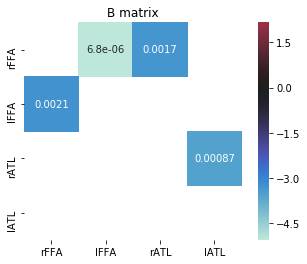

In [6]:
# do t-tests for all parameters

from scipy.stats import ttest_1samp
import csv

T, p = ttest_1samp(Bmatrices, 0, axis= 2)

# convert p to binary (sig or n.s.)
pLogic = p < ( 0.05 / 8 )
pMask  = p > ( 0.05 / 8 )

sns.heatmap(data = T,
           center = 0,
           xticklabels = regionNames,
           yticklabels = regionNames,
           square = True,
           # = 'source region')
           annot = p,
           mask = pMask
           )
plt.title('B matrix')

C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


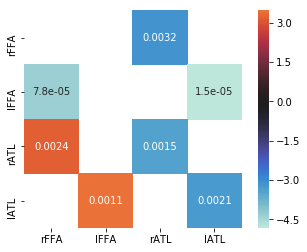

In [106]:
# A matrix
T, p = ttest_1samp(Amatrices, 0, axis= 2)

# convert p to binary (sig or n.s.)
pLogic = p < ( 0.05 / 12 )
pMask  = p > ( 0.05 / 12 )

sns.heatmap(data = T,
           center = 0,
           xticklabels = regionNames,
           yticklabels = regionNames,
           square = True,
           # = 'source region')
           annot = p,
           mask = pMask
           )

In [85]:
p

array([[           nan, 6.76577687e-06, 1.67440770e-03,            nan],
       [2.07977314e-03,            nan,            nan, 4.25996051e-01],
       [3.55742311e-02,            nan,            nan, 8.65366121e-04],
       [           nan, 1.31158911e-01, 1.11872827e-01,            nan]])

In [11]:
# import covariates for correlations
covFolder = 'C:/Users/Roman/Desktop/Projects/Prosopagnosia/covariates/'

df = pd.read_excel(covFolder + 'covariates_all1.xlsx')
df.head()


,Proband,Prosopagnosie,TAS,ASQ,sex,age
0,01_02,0.5972,39,7,1,30
1,01_03,0.7639,35,7,1,40
2,01_04,0.9028,28,1,0,21
3,01_05,0.5139,41,9,0,23
4,01_06,0.6806,46,18,1,26


In [12]:
df.Prosopagnosie.values

array([0.5972, 0.7639, 0.9028, 0.5139, 0.6806, 0.9028, 0.7361, 0.9167,
       0.8333, 0.7917, 0.8194, 0.625 , 0.5417, 0.625 , 0.8194, 0.9861,
       0.4861, 0.6528, 0.7778, 0.8472, 0.9583, 0.8333, 0.7083, 0.625 ,
       0.5556, 0.8472, 0.9028, 0.9306, 0.8333, 0.5694, 0.9444, 0.75  ,
       0.8889, 0.6667, 0.4722, 0.4861, 0.8194, 0.625 , 0.6528, 0.8472,
       0.7361, 0.625 , 0.8472, 0.8472, 0.6368, 0.7778, 0.8056, 0.8472,
       0.9028])

In [8]:
from scipy.stats import pearsonr

In [117]:
r

-0.32234537894512844

In [143]:
p

0.02389362356571091

C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Text(0.5,1,'correlation with Prosopagnosia')

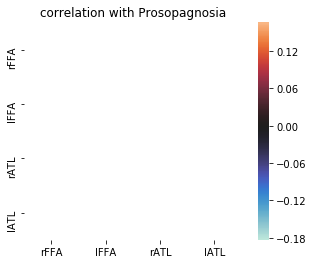

In [13]:
# correlation of b matrix with proso

rs = np.zeros((Nreg,Nreg))
ps = np.zeros((Nreg,Nreg))

for i in range(Nreg):
    for j in range(Nreg):
        rs[i,j], ps[i,j] = pearsonr(Bmatrices[i,j,:], df.Prosopagnosie.values)

# convert p to binary (sig or n.s.)
pLogic = ps < ( 0.05 / 1 )
pMask  = ps > ( 0.05 / 1 )

sns.heatmap(data = rs,
           center = 0,
           xticklabels = regionNames,
           yticklabels = regionNames,
           square = True,
           # = 'source region')
           annot = ps,
           mask = pMask,
           #title = 'p < 0.05 uncorrected'
           )
plt.title('correlation with Prosopagnosia')

C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Text(0.5,1,'correlation with Alexithymia')

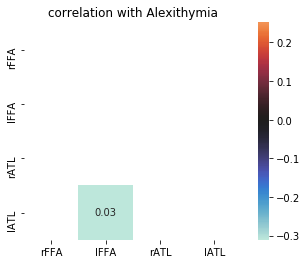

In [15]:
# correlation of b matrix with alexi

rs = np.zeros((Nreg,Nreg))
ps = np.zeros((Nreg,Nreg))

for i in range(Nreg):
    for j in range(Nreg):
        rs[i,j], ps[i,j] = pearsonr(Bmatrices[i,j,:], df.TAS.values)

# convert p to binary (sig or n.s.)
pLogic = ps < ( 0.05 / 1 )
pMask  = ps > ( 0.05 / 1 )

sns.heatmap(data = rs,
           center = 0,
           xticklabels = regionNames,
           yticklabels = regionNames,
           square = True,
           # = 'source region')
           annot = ps,
           mask = pMask,
           #title = 'p < 0.05 uncorrected'
           )
plt.title('correlation with Alexithymia')

C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Text(0.5,1,'correlation with Autism')

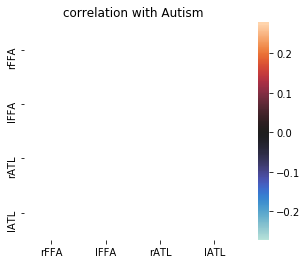

In [14]:
# correlation of b matrix with alexi

rs = np.zeros((Nreg,Nreg))
ps = np.zeros((Nreg,Nreg))

for i in range(Nreg):
    for j in range(Nreg):
        rs[i,j], ps[i,j] = pearsonr(Bmatrices[i,j,:], df.ASQ.values)

# convert p to binary (sig or n.s.)
pLogic = ps < ( 0.05 / 1 )
pMask  = ps > ( 0.05 / 1 )

sns.heatmap(data = rs,
           center = 0,
           xticklabels = regionNames,
           yticklabels = regionNames,
           square = True,
           # = 'source region')
           annot = ps,
           mask = pMask,
           #title = 'p < 0.05 uncorrected'
           )
plt.title('correlation with Autism')

C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Text(0.5,1,'correlation with sex')

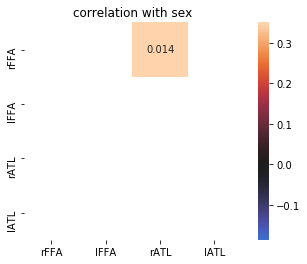

In [16]:
# correlation of b matrix with alexi

rs = np.zeros((Nreg,Nreg))
ps = np.zeros((Nreg,Nreg))

for i in range(Nreg):
    for j in range(Nreg):
        rs[i,j], ps[i,j] = pearsonr(Bmatrices[i,j,:], df.sex.values)

# convert p to binary (sig or n.s.)
pLogic = ps < ( 0.05 / 1 )
pMask  = ps > ( 0.05 / 1 )

sns.heatmap(data = rs,
           center = 0,
           xticklabels = regionNames,
           yticklabels = regionNames,
           square = True,
           # = 'source region')
           annot = ps,
           mask = pMask,
           #title = 'p < 0.05 uncorrected'
           )
plt.title('correlation with sex')

C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Text(0.5,1,'correlation with age')

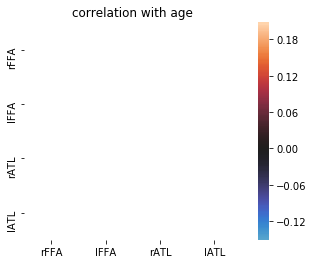

In [17]:
# correlation of b matrix with alexi

rs = np.zeros((Nreg,Nreg))
ps = np.zeros((Nreg,Nreg))

for i in range(Nreg):
    for j in range(Nreg):
        rs[i,j], ps[i,j] = pearsonr(Bmatrices[i,j,:], df.age.values)

# convert p to binary (sig or n.s.)
pLogic = ps < ( 0.05 / 1 )
pMask  = ps > ( 0.05 / 1 )

sns.heatmap(data = rs,
           center = 0,
           xticklabels = regionNames,
           yticklabels = regionNames,
           square = True,
           # = 'source region')
           annot = ps,
           mask = pMask,
           #title = 'p < 0.05 uncorrected'
           )
plt.title('correlation with age')

In [156]:
# linear model

In [162]:
from sklearn.linear_model import LinearRegression

In [168]:
df = df.drop(['Proband'], axis = 1) # drop the Proband variable as we do not need it


In [172]:
df.Prosopagnosie = df.Prosopagnosie.values - np.mean(df.Prosopagnosie.values)

In [170]:
# Menschen mit einer Punktzahl gleich oder kleiner 51 nicht alexithym,
# zwischen 52 und 60 möglicherweise alexithym und bei über 61 hochwahrscheinlich alexithym sind''

# continue here
df.TAS = df.TAS.values - np.mean(df.TAS.values)

In [173]:
df.ASQ = df.ASQ.values - np.mean(df.ASQ.values)

In [175]:
df.age = df.age.values - np.mean(df.age.values)

In [176]:
df.head()

,Prosopagnosie,TAS,ASQ,sex,age
0,-0.153039,-14.428571,-1.571429,1,2.653061
1,0.013661,-18.428571,-1.571429,1,12.653061
2,0.152561,-25.428571,-7.571429,0,-6.346939
3,-0.236339,-12.428571,0.428571,0,-4.346939
4,-0.069639,-7.428571,9.428571,1,-1.346939


In [184]:
y = Bmatrices[2,0,:] # rFFA to rATL
y

array([-0.14551099,  1.4116632 ,  0.16005208,  0.38427499,  0.23444468,
       -0.51143809, -0.44145411,  0.05918284,  0.07573444,  1.03870122,
        0.05027578, -0.09869893,  0.0783172 , -0.17119961, -0.22913096,
        0.1595191 ,  0.07216501,  0.21849349,  0.03831627, -0.51102419,
        0.79725707,  0.03617061,  0.06232602,  0.11311413,  0.30029203,
       -0.03743032,  0.34200033, -0.08388861, -0.45692307,  0.01536276,
       -0.05632589,  0.        ,  0.03434771,  0.2877909 , -0.02030441,
        0.15726434, -0.03124487, -0.16089253,  0.31054523,  0.36090405,
        0.04856667,  0.52234601, -0.17237129,  0.32189477,  0.19042886,
       -0.11099457,  0.12332958,  0.47538739,  0.02325714])

In [183]:
x = df.values
x.shape

(49, 5)

In [185]:
model = LinearRegression().fit(x, y)

In [186]:
# get results

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)


coefficient of determination: 0.0315084315627181
intercept: 0.0818074724335265
slope: [-0.01735424 -0.00106397  0.01309614  0.05710579 -0.00185701]


In [187]:
import statsmodels.api as sm

In [193]:
for i in range(Nreg):
    for j in range(Nreg):

        y = Bmatrices[i,j,:] # rFFA to rATL
        print('from ' + regionNames[j] + ' to ' + regionNames[i])

        # Note the difference in argument order
        model = sm.OLS(y, x).fit()
        predictions = model.predict(x) # make the predictions by the model

        # Print out the statistics
        #model.summary()
        print( 'p values: ' + str(model.pvalues))

from rFFA to rFFA
p values: [nan nan nan nan nan]
from lFFA to rFFA
p values: [0.30883321 0.99661152 0.58889272 0.01238157 0.85056501]
from rATL to rFFA
p values: [0.80538125 0.85412544 0.31742591 0.45040038 0.22810923]
from lATL to rFFA
p values: [nan nan nan nan nan]
from rFFA to lFFA
p values: [0.58429442 0.37063399 0.42016186 0.04542683 0.09904785]
from lFFA to lFFA
p values: [nan nan nan nan nan]
from rATL to lFFA
p values: [nan nan nan nan nan]
from lATL to lFFA
p values: [0.23959355 0.64820156 0.266584   0.35654716 0.42063971]
from rFFA to rATL
p values: [0.93501199 0.82057592 0.33727606 0.0775033  0.64252457]
from lFFA to rATL
p values: [nan nan nan nan nan]
from rATL to rATL
p values: [nan nan nan nan nan]
from lATL to rATL
p values: [0.09996946 0.12434837 0.05074432 0.00674842 0.61608891]
from rFFA to lATL
p values: [nan nan nan nan nan]
from lFFA to lATL
p values: [0.46828343 0.13667847 0.30840704 0.6225823  0.51146309]
from rATL to lATL
p values: [0.78016991 0.31269564 0.19

C:\Users\Roman\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Roman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


so wie es aussieht, wird wenn überhaupt, der p Wert für Geschlecht signifikant, somit ist dass in manchen Parametern die "signifikanteste" Erklärende Variable. Die anderen, u.a. Proso, werden eher n.s.